In [2]:
import sys
sys.path.append("..")

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from ml.weights import college_features, noncollege_features
from ml.playstyles import compute_playstyle_clusters

year = 2024
classification = "College"  # or "G League", "International", "Overtime Elite"
features = college_features if classification == "College" else noncollege_features

# Load player data
df = pd.read_csv(f"../data/processed/{year}/draftpool_stats_{year}.csv")
df = df[df["classification"] == classification].copy()

# Apply clustering (this uses the saved kmeans model from fit_global_clusters)
df_clustered = compute_playstyle_clusters(df, features, classification)

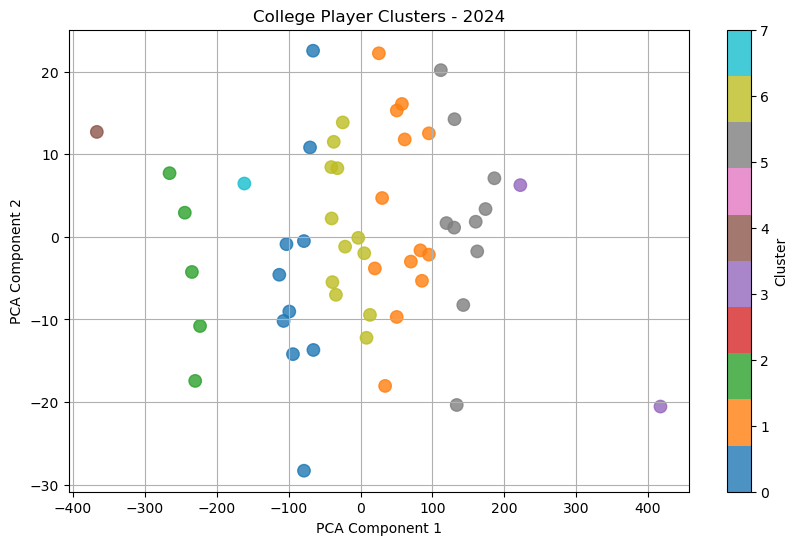

In [3]:
# Drop rows with missing features
df_clean = df_clustered.dropna(subset=features).copy()

# PCA projection
pca = PCA(n_components=2)
components = pca.fit_transform(df_clean[features])

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=df_clean["cluster"], cmap="tab10", s=80, alpha=0.8)
plt.title(f"{classification} Player Clusters - {year}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

In [4]:
for clust in sorted(df_clustered["cluster"].dropna().unique()):
    names = df_clustered[df_clustered["cluster"] == clust]["Name"].tolist()
    print(f"\n🧩 Cluster {clust} ({len(names)} players):")
    for name in names:
        print(f" - {name}")


🧩 Cluster -1 (2 players):
 - Yves Missi
 - N'Faly Dante

🧩 Cluster 0 (10 players):
 - Reed Sheppard
 - Stephon Castle
 - Donovan Clingan
 - Kel'el Ware
 - Isaiah Collier
 - Jaylen Wells
 - Adem Bona
 - Jalen Bridges
 - Boogie Ellis
 - Keshad Johnson

🧩 Cluster 1 (13 players):
 - Jaylon Tyson
 - Jonathan Mogbo
 - Kyle Filipowski
 - Tyler Kolek
 - Ajay Mitchell
 - Oso Ighodaro
 - Jamal Shead
 - Antonio Reeves
 - Quinten Post
 - Cam Spencer
 - Reece Beekman
 - PJ Hall
 - Zyon Pullin

🧩 Cluster 2 (5 players):
 - Cody Williams
 - Kyshawn George
 - Ryan Dunn
 - Johnny Furphy
 - Justin Edwards

🧩 Cluster 3 (2 players):
 - Zach Edey
 - KJ Simpson

🧩 Cluster 4 (1 players):
 - Bronny James

🧩 Cluster 5 (10 players):
 - Devin Carter
 - Dalton Knecht
 - DaRon Holmes II
 - Dillon Jones
 - Terrence Shannon Jr.
 - Baylor Scheierman
 - Tristen Newton
 - Enrique Freeman
 - Trey Alexander
 - Judah Mintz

🧩 Cluster 6 (12 players):
 - Rob Dillingham
 - Carlton Carrington
 - Jared McCain
 - Tristan da Sil